In [8]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('..')

import os
import re
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import color.data.colors_big as dataset

In [2]:
# Choose embedding file
datasets_path = os.path.join('..', 'datasets')
emb_dir = os.path.join(datasets_path, 'embeddings')
emb_files = [os.path.join(emb_dir, f) for f in os.listdir(emb_dir)]
emb_dims = 50 # 50, 100, 200, 300
emb_file = list(filter(lambda f: str(emb_dims) in f, emb_files))[0]
emb_file

'../datasets/embeddings/glove.6B.50d.txt'

In [67]:
# Parse embeddings
emb_df = pd.read_csv(emb_file, sep=' ', engine='c', encoding='utf-8',
                     quoting=csv.QUOTE_NONE, header=None,
                     keep_default_na=False, na_values=['%%%&&&???@@@'])
vocab = emb_df[0]
emb_df.drop(0, axis=1, inplace=True)
emb_matrix = emb_df.astype('float').values
emb_dict = {vocab[i]: emb_matrix[i] for i in range(len(vocab))}

In [50]:
# Embedding Characters
emb_words = set(vocab)
emb_chars = set()
for word in emb_words:
    for char in word:
        emb_chars.add(char)
print(len(emb_chars))
#emb_chars

489


In [53]:
# Extract words from color names
color_words = set()
color_names, color_rgb = dataset.load_color_names()
print('Color map:', color_rgb.shape)
for name in color_names:
    for comps in name.split():
        color_words.add(comps.lower())
len(color_words)

Color map: (18081, 3)


9807

In [54]:
# Color names characters
color_chars = set()
for word in color_words:
    for char in word:
        color_chars.add(char)
print(len(color_chars))
# color_chars

90


In [57]:
# Overlaps
common_words = color_words & emb_words
print('Common Words: {} [{:.2f}%]'.format(len(common_words), len(common_words)*100/len(color_words)))

common_chars = color_chars & emb_chars
print('Common Characters: {} [{:.2f}%]'.format(len(common_chars), len(common_chars)*100/len(color_chars)))

print('Missing Words (50):')
print(list(color_words - emb_words)[:50])

print('Missing Characters:')
print(list(color_chars - emb_chars))


Common Words: 8300 [84.63%]
Common Characters: 88 [97.78%]
Missing Words (50):
['spiritstone', 'raftsman', "bunny's", 'gungeon', 'zinnwaldite', 'rurikon', 'orange-coloured', 'oakmoss', 'leever', 'rainsong', 'tetsu-kon', "baker's", 'kakitsubata', 'kālā', 'camaron', "cat's", "zeus'temple", "surf'n'dive", 'xanthous', 'kiriume', 'ashlite', 'grunervetliner', 'nasake', 'scrofulous', 'torns', 'araigaki', "hawker's", 'narwhale', 'champignon', 'koromiko', "pirate's", 'waikawa', 'freinacht', 'transtasman', 'bloedworst', 'deathworld', 'shattan', "ragin'", 'maine-anjou', "newman's", 'gretchin', 'mauvewood', 'algen', 'hanyauku', 'opale', 'fogtown', 'blockchain', 'anti-flash', 'ephren', 'horenso']
Missing Characters:
['ǎ', 'ǜ']


In [58]:
# Get embeddings for words
# For known words (which have embeddings) just lookup the embedding
# For any other word, generate a random embedding
known_words = ['red', 'black', 'peachy', 'watermelon', 'dog']
unknown_words = ['sussie', 'truesky', "elmer's", 'skavenblight', "bunny's"]
for word in [*known_words, *unknown_words]:
    if word in embs:
        known = True
        emb = np.array(embs[word])
    else:
        known = False
        emb = np.random.rand(emb_dims) - 0.5  # Range (-0.5, 0.5)
    print("Word: {}, Known: {}, Emb Shape: {}\nEmbedding: {}".format(word, known, emb.shape, emb))

Word: red, Known: False, Emb Shape: (50,)
Embedding: [-0.42017416  0.030629   -0.12069886  0.07137363 -0.23928198 -0.14002044
 -0.18749529 -0.08711299 -0.32022308 -0.42217045  0.36405745 -0.43037562
  0.41439147 -0.39647849  0.00874383  0.23257089 -0.44012118  0.23946008
 -0.35947214  0.37777285  0.32424528 -0.30560484 -0.23740226 -0.45247854
 -0.26398844 -0.11026177  0.32440042 -0.4967099   0.49294821  0.22678663
 -0.43815105 -0.16657003  0.14286333 -0.47225643 -0.22046569 -0.41692315
  0.43395775 -0.32073136 -0.08131533 -0.06441965 -0.48753654  0.36865429
  0.38284388 -0.19732075  0.3312308  -0.45690748 -0.12468667 -0.02646317
  0.19882709  0.41707963]
Word: black, Known: False, Emb Shape: (50,)
Embedding: [ 0.0687237   0.39893446  0.41599469  0.10795043 -0.37799478 -0.36870995
  0.24009928  0.32903752  0.18085487  0.41154506 -0.47762727 -0.45624384
  0.15594397 -0.45159828 -0.29016341 -0.0061227   0.18777302 -0.47749058
  0.08249739  0.33746245  0.24304238 -0.15282548  0.45254387  0

In [60]:
# Check similarity b/w words
def similarity(x, y):
    return np.dot(x, y.T) / (np.sqrt(np.dot(x, x.T)) * np.sqrt(np.dot(y, y.T)))

words = [
    ['woman', 'kitchen'],
    ['woman', 'object'],
    ['woman', 'woman'],
]
for word1, word2 in words:
    emb1, emb2 = np.array(emb_dict[word1]), np.array(emb_dict[word2])
    print('Similarity b/w "{}" and "{}" is {}'.format(word1, word2, similarity(emb1, emb2)))

Similarity b/w "woman" and "kitchen" is 0.4181231013837278
Similarity b/w "woman" and "object" is 0.4139111260693676
Similarity b/w "woman" and "woman" is 1.0000000000000002


In [80]:
# Get closest words for embeddings
emb_red = np.array(['-0.12878', '0.8798', '-0.60694', '0.12934', '0.5868', '-0.038246', '-1.0408',
 '-0.52881', '-0.29563', '-0.72567', '0.21189', '0.17112', '0.19173', '0.36099',
 '0.032672', '-0.2743', '-0.19291', '-0.10909', '-1.0057', '-0.93901', '-1.0207',
 '-0.69995', '0.57182', '-0.45136', '-1.2145', '-1.1954', '-0.32758', '1.4921',
 '0.54574', '-1.0008', '2.845', '0.26479', '-0.49938', '0.34366', '-0.12574',
 '0.5905', '-0.037696', '-0.47175', '0.050825', '-0.20362', '0.13695', '0.26686',
 '-0.19461', '-0.75482', '1.0303', '-0.057467', '-0.32327', '-0.7712',
 '-0.16764', '-0.73835']).astype(np.float).reshape(50,1)

emb_random = np.random.rand(50) - 0.5
emb_curr = emb_red

embs_mag = np.sqrt(np.sum(emb_matrix*emb_matrix, axis=1)).reshape(-1)
emb_curr_mag = np.sqrt(np.dot(emb_curr.T, emb_curr)).reshape(-1)
emb_dot = np.dot(emb_matrix, emb_curr).reshape(-1)

embs_sim = emb_dot / (embs_mag * emb_curr_mag)

# Most similar word
print('Most similar word:', vocab[np.argmax(embs_sim)], embs_sim[np.argmax(embs_sim)])

# Most dissimilar word
print('Most dissililar word', vocab[np.argmin(embs_sim)], embs_sim[np.argmin(embs_sim)])

Most similar word: red 0.9999999999999999
Most dissililar word esber -0.7445946751683283


In [82]:
# Embedding Sample
idx = np.arange(len(embs))
np.random.shuffle(idx)
samp_size = 10000
samp = emb_matrix[idx[:samp_size]]
samp.shape

(10000, 50)

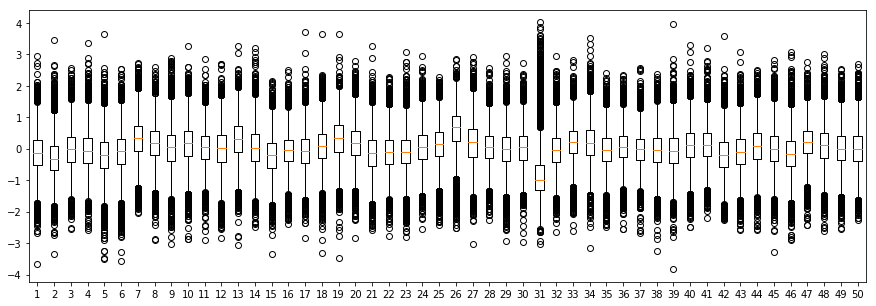

In [83]:
# Embedding Distribution
plt.figure(figsize=(15,5))
plt.boxplot(samp)
plt.show()

In [84]:
# Summary
df = pd.DataFrame(samp)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.128913,-0.287119,-0.015982,-0.048720,-0.193887,-0.089898,0.334459,0.165265,0.034851,0.172513,...,0.130428,-0.166250,-0.083171,0.085733,-0.005858,-0.136789,0.201722,0.106205,0.011676,0.010767
std,0.637121,0.614280,0.606676,0.620450,0.644600,0.662514,0.623808,0.614849,0.650966,0.625752,...,0.570961,0.613174,0.611984,0.626486,0.629213,0.631906,0.561227,0.618877,0.604612,0.625285
min,-3.647400,-3.334700,-2.543900,-2.585100,-3.500500,-3.563700,-2.050200,-2.885200,-3.032100,-2.875800,...,-2.200300,-2.254900,-2.595500,-2.564400,-3.275500,-2.887600,-2.429200,-2.624700,-2.548300,-2.270500
25%,-0.527590,-0.681225,-0.412850,-0.457500,-0.599025,-0.495557,-0.055971,-0.210820,-0.375077,-0.220480,...,-0.231703,-0.574237,-0.471852,-0.314528,-0.402667,-0.531918,-0.146490,-0.285423,-0.370648,-0.400423
50%,-0.130305,-0.319205,-0.012799,-0.072452,-0.184370,-0.080238,0.347490,0.194300,0.043417,0.185690,...,0.124160,-0.188165,-0.093076,0.092552,-0.009706,-0.164610,0.210215,0.111255,0.002454,0.000381
75%,0.277413,0.080484,0.380872,0.342650,0.220960,0.322918,0.733788,0.577850,0.440562,0.579548,...,0.486860,0.214082,0.296660,0.501978,0.397930,0.245485,0.565365,0.499485,0.399182,0.411935
max,2.940900,3.460400,2.557200,3.366300,3.637400,2.547100,2.719200,2.591600,2.871900,3.269400,...,3.198400,3.594200,3.080700,2.518500,2.826400,3.074200,2.743400,2.998900,2.521700,2.708900


In [86]:
print('IQR:', np.percentile(samp, 25), np.percentile(samp, 75))
print('Mean:', np.mean(samp))

IQR: -0.3889925 0.4374925
Mean: 0.021097755592983436
